In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

import cv2
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import mnist

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
def display_confusion_matrix(y_true, y_pred): 
    cm = confusion_matrix (y_true, y_pred)
    ConfusionMatrixDisplay(cm).plot()


ModuleNotFoundError: No module named 'numpy'

(20000, 784)
(20000,)
True label for the plotted image is 1


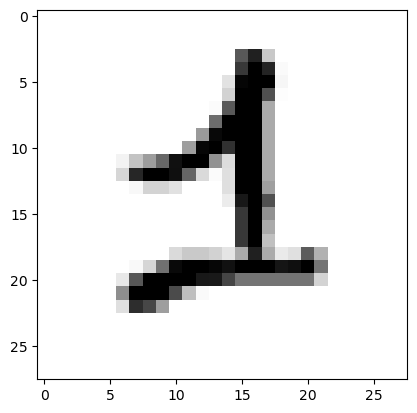

In [ ]:
# Load data and inspect it
mnist = fetch_openml("mnist_784", version=1, cache=True, as_frame=False)
X = mnist["data"][:20000]
y = mnist["target"][:20000].astype(np.uint8)
print(X.shape)
print(y.shape)

some_digit = X[24]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
print("True label for the plotted image is", y[24])

# print(mnist.DESCR)

In [42]:
# Splitting data
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=2000, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=2000, random_state=42)


In [43]:
# Scaling data
scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


In [44]:
logreg_clf = LogisticRegression(max_iter=1000)
random_forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
extra_trees_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)

named_estimators = [
    ("logreg_clf", logreg_clf),
    ("random_forest_clf", random_forest_clf),
    ("extra_trees_clf", extra_trees_clf)
]
voting_clf = VotingClassifier(named_estimators, voting="hard")

models = [logreg_clf, random_forest_clf, extra_trees_clf, voting_clf]
for model in models:
    model.fit(X_train, y_train)

print("Accuracy for each model")
model_names = ["Logistic Regression", "Random Forest", "Extra Trees", "Voting Classifier"]
for name, model in zip(model_names, models):
    score = model.score(X_val, y_val)
    print(F"{name:20s}: {score:.4f}")

Accuracy for each model
Logistic Regression : 0.8950
Random Forest       : 0.9545
Extra Trees         : 0.9550
Voting Classifier   : 0.9550


              precision    recall  f1-score   support

           0       0.97      0.98      0.97       217
           1       0.96      0.99      0.97       246
           2       0.93      0.95      0.94       184
           3       0.94      0.94      0.94       200
           4       0.98      0.96      0.97       175
           5       0.96      0.94      0.95       180
           6       0.95      0.98      0.96       208
           7       0.98      0.94      0.96       196
           8       0.94      0.89      0.91       178
           9       0.94      0.95      0.95       216

    accuracy                           0.95      2000
   macro avg       0.96      0.95      0.95      2000
weighted avg       0.96      0.95      0.95      2000



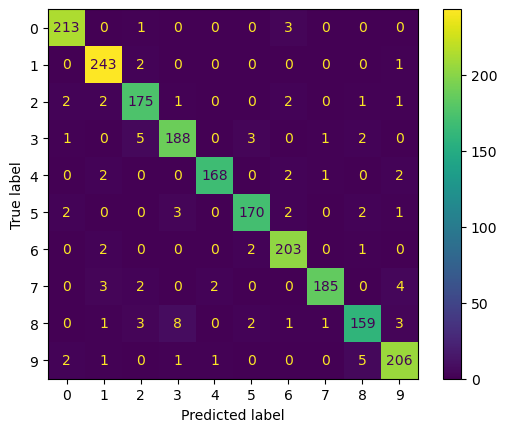

In [45]:
et_pred_val = extra_trees_clf.predict(X_val)

display_confusion_matrix(y_val, et_pred_val)
print(classification_report(y_val, et_pred_val))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       188
           1       0.99      0.98      0.98       243
           2       0.97      0.94      0.95       185
           3       0.94      0.93      0.93       204
           4       0.97      0.97      0.97       198
           5       0.95      0.97      0.96       169
           6       0.97      0.98      0.97       194
           7       0.96      0.97      0.96       206
           8       0.93      0.92      0.93       205
           9       0.94      0.95      0.95       208

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000



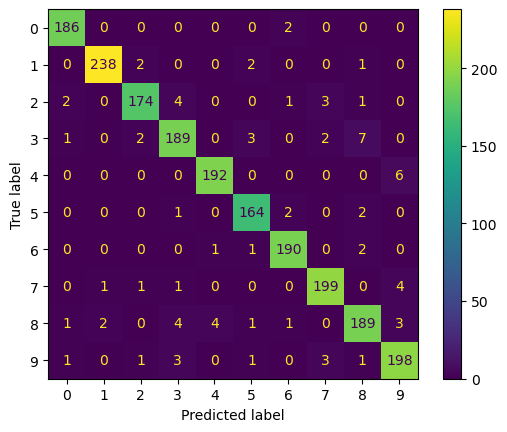

In [46]:
# Refit model on train + validation data
X_train_val = scaler.fit_transform(X_train_val)
extra_trees_clf.fit(X_train_val, y_train_val)

# Evaluate it on test data
et_pred_test = extra_trees_clf.predict(X_test)
display_confusion_matrix(y_test, et_pred_test)
print(classification_report(y_test, et_pred_test))

In [34]:
scaler_2 = StandardScaler()
X = scaler_2.fit_transform(X)
extra_trees_clf.fit(X, y)

ExtraTreesClassifier(random_state=42)

AttributeError: 'ExtraTreesClassifier' object has no attribute 'feature_impportances_'

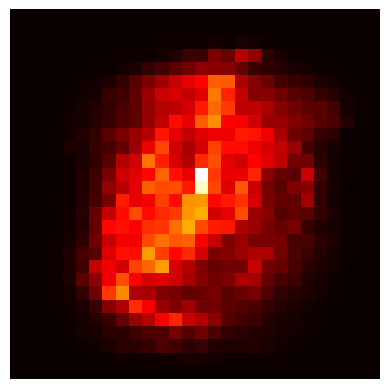

In [39]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap=mpl.cm.hot, interpolation="nearest")
    plt.axis("off")

plot_digit(extra_trees_clf.feature_importances_)

cbar = plt.colorbar(ticks=[extra_trees_clf.feature_impportances_.min(), extra_trees_clf.feature_importances_.max()])